# Wrangle

In [1]:
#Importing required packages
import pandas as pd
import numpy as np
import datetime as dt
import tweepy
import requests
import json
import re
import nltk
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#opening the udacity's twitter file to a dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.set_index('tweet_id', inplace = True)
archive.head(2)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [39]:
#downloading the neural net predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    
images = pd.read_csv('image-predictions.tsv', sep='\t')
images.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [40]:
#preparing the Twitter Scraper
consumer_key = "NnnuFICAK0AtKBWsWtJq8Ef7p"
consumer_secret = "qJqGvc55Ur7wbX8uoXMgaR2OxzmJ7U83ORuLNSvrJSSPw4suv9"
access_token = "794789879892709376-im3xuK4apMapj4IfTmvTz5P7Qcm6yZk"
access_token_secret = "lWVyVfZP3eMb7gwFiipqeFvCXGaTb5GVjefrnpUJS7SPG"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [43]:
#initiaing scraping, with exceptions
df_list = []
tweet_id = images['tweet_id']
try:
    for id in tweet_id:
        page = api.get_status(id)
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        day_time = pd.to_datetime(page['created_at'])
        df_list.append({'tweet_id': int(id),'favorites': int(favorites),'retweet_count': int(retweet_count)})
    
except:
    e_list.append(id)

In [44]:
print df_list

[{'tweet_id': 666020888022790149, 'retweet_count': 520, 'favorites': 2560}, {'tweet_id': 666029285002620928, 'retweet_count': 47, 'favorites': 131}, {'tweet_id': 666033412701032449, 'retweet_count': 45, 'favorites': 125}, {'tweet_id': 666044226329800704, 'retweet_count': 141, 'favorites': 301}, {'tweet_id': 666049248165822465, 'retweet_count': 40, 'favorites': 109}, {'tweet_id': 666050758794694657, 'retweet_count': 58, 'favorites': 133}, {'tweet_id': 666051853826850816, 'retweet_count': 859, 'favorites': 1231}, {'tweet_id': 666055525042405380, 'retweet_count': 257, 'favorites': 441}, {'tweet_id': 666057090499244032, 'retweet_count': 142, 'favorites': 299}, {'tweet_id': 666058600524156928, 'retweet_count': 58, 'favorites': 113}, {'tweet_id': 666063827256086533, 'retweet_count': 223, 'favorites': 480}, {'tweet_id': 666071193221509120, 'retweet_count': 62, 'favorites': 148}, {'tweet_id': 666073100786774016, 'retweet_count': 169, 'favorites': 326}, {'tweet_id': 666082916733198337, 'retweet

In [46]:
e_list

[666094000022159362, 802247111496568832]

In [47]:
#double checking the error list
ee_list = []
for e in e_list:
    try:
        page = api.get_status(e)
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        day_time = pd.to_datetime(page['created_at'])
        df_list.append({'tweet_id': int(e),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)})
        
    except Exception:
        ee_list.append(id)

In [48]:
print ee_list

[802247111496568832]


In [49]:
#parsing json data and storing them in csv format
jsondf = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet_count'])
jsondf.to_csv('tweet_json.txt', encoding = 'utf-8')

In [50]:
jsondf = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
jsondf.set_index('tweet_id', inplace = True)
jsondf.tail(4)

,Unnamed: 0,favorites,retweet_count
tweet_id,,,
801538201127157760,1612,8978,2335
801958328846974976,1613,8464,1933
802239329049477120,1614,9943,2948
666094000022159362,1615,166,76


In [51]:
#making a copy for backup
images.set_index('tweet_id', inplace = True)
df = pd.merge(left=archive, right=images, left_index=True, right_index=True, how='left')
df = pd.merge(left=df, right=jsondf, left_index=True, right_index=True, how='left')
df.to_csv('dfcopy.csv', encoding = 'utf-8') # this is how I make a copy, back it up to a file

In [2]:
df = pd.read_csv('dfcopy.csv') #start here to load the notebook while working on it

In [3]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,favorites,retweet_count
0,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.0,2560.0,520.0
1,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,1.0,131.0,47.0
2,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,True,malinois,0.138584,True,bloodhound,0.116197,True,2.0,125.0,45.0
3,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,3.0,301.0,141.0
4,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,4.0,109.0,40.0
5,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,...,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,5.0,133.0,58.0
6,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,...,False,mud_turtle,0.045885,False,terrapin,0.017885,False,6.0,1231.0,859.0
7,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,...,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,7.0,441.0,257.0
8,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,...,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,8.0,299.0,142.0
9,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,...,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,9.0,113.0,58.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 31 columns):
tweet_id                      2357 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2357 non-null object
source                        2357 non-null object
text                          2357 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2298 non-null object
rating_numerator              2357 non-null int64
rating_denominator            2357 non-null int64
name                          2357 non-null object
doggo                         2357 non-null object
floofer                       2357 non-null object
pupper                        2357 non-null object
puppo                         2357 non-null object
jpg_url                       20

## DATA QUALITY ISSUE : 1
<br> ***Deleting the 'Unamed: 0' column as it is just a floating point replication of the index***


In [5]:
 del df['Unnamed: 0'] #code
list(df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorites',
 'retweet_count']

## DATA QUALITY ISSUE : 2
<br> ***Converting the present timestamp to datetime format***

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 30 columns):
tweet_id                      2357 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2357 non-null datetime64[ns]
source                        2357 non-null object
text                          2357 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2298 non-null object
rating_numerator              2357 non-null int64
rating_denominator            2357 non-null int64
name                          2357 non-null object
doggo                         2357 non-null object
floofer                       2357 non-null object
pupper                        2357 non-null object
puppo                         2357 non-null object
jpg_url                 

## DATA QUALITY ISSUE : 3
<br> ***Getting rid of the rows we won't use, the ones without pics and the retweets as they can affect our analysis on retweets***

In [7]:
df = df[pd.notnull(df['jpg_url'])] #without pics
df = df[pd.isnull(df['retweeted_status_id'])] #additional retweets
len(df['text'])

1995

In [8]:
del df['retweeted_status_id']
del df['retweeted_status_user_id']
del df['retweeted_status_timestamp']
list(df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorites',
 'retweet_count']

## DATA QUALITY ISSUE : 4
<br> ***URLS cannot be used for our data analysis, hence they are removed.***

In [9]:
del df['expanded_urls']
del df['jpg_url']
del df['img_num']
list(df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorites',
 'retweet_count']

## DATA QUALITY ISSUE : 5
<br> ***This is an extension of DQI:5. More unneccesary data are rendered useless for analysis.***

In [10]:
#deleting coulmns which we can't use for analysis : part 2
del df['in_reply_to_status_id']
del df['in_reply_to_user_id']
list(df)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorites',
 'retweet_count']

## DATA TIDINESS ISSUE : 1

In [11]:
#lets condense the 'dog type' columns into one
dog_type = []

string_in = ['puppo', 'pupper', 'doggo', 'floof']
string_out = ['puppo', 'pupper', 'doggo', 'floofer']

for row in df['text']:
    row = row.lower()
    for word in string_in:
        if word in str(row):
            dog_type.append(string_out[string_in.index(word)])
            break
    else:
        dog_type.append('None')

df['dog_type'] = dog_type
df['dog_type'].value_counts()


None       1626
pupper      237
doggo        69
floofer      34
puppo        29
Name: dog_type, dtype: int64

## DATA QUALITY ISSUE : 6

In [12]:
#dropping the 4 coulmns they were combined to one
df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [13]:
list(df)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorites',
 'retweet_count',
 'dog_type']

In [14]:
df.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweet_count,dog_type
0,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,8,10,None,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,2560.0,520.0,None
1,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,131.0,47.0,None


In [15]:
#we wont be needing the soure URL also
del df['source']

In [16]:
list(df)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorites',
 'retweet_count',
 'dog_type']

## DATA TIDINESS ISSUE : 2

In [17]:
# next let's condense the dog breed analysis
breed = []
confidence = []

def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        confidence.append(0)
      
    # this isn't about the parsing AI so the rest of this data is deletable

df.apply(breed_confidence, axis=1)
df['breed'] = breed
df['confidence'] = confidence
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweet_count,dog_type,breed,confidence
0,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,2560.0,520.0,None,Welsh_springer_spaniel,0.465074
1,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,7,10,a,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,131.0,47.0,None,redbone,0.506826
2,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,9,10,a,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,125.0,45.0,None,German_shepherd,0.596461
3,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,301.0,141.0,None,Rhodesian_ridgeback,0.408143
4,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,109.0,40.0,None,miniature_pinscher,0.560311


## DATA QUALITY ISSUE : 7

In [18]:
#dropping the unwanted columns as they were processed
df.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorites,retweet_count,dog_type,breed,confidence
0,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,2560.0,520.0,None,Welsh_springer_spaniel,0.465074
1,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,7,10,a,131.0,47.0,None,redbone,0.506826
2,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,9,10,a,125.0,45.0,None,German_shepherd,0.596461
3,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,301.0,141.0,None,Rhodesian_ridgeback,0.408143
4,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,109.0,40.0,None,miniature_pinscher,0.560311


## DATA QUALITY ISSUE : 8

In [19]:
#attepmt to remove null values and useless data
df.loc[df['breed'] == 'Unidentifiable', 'breed'] = None
df.loc[df['dog_type'] == 'None', 'dog_type'] = None
df.loc[df['confidence'] == 0.0, 'confidence'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 2356
Data columns (total 11 columns):
tweet_id              1995 non-null int64
timestamp             1995 non-null datetime64[ns]
text                  1995 non-null object
rating_numerator      1995 non-null int64
rating_denominator    1995 non-null int64
name                  1995 non-null object
favorites             1575 non-null float64
retweet_count         1575 non-null float64
dog_type              369 non-null object
breed                 1687 non-null object
confidence            1687 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 187.0+ KB


In [20]:
df.to_csv('twitter_archive_master.csv', encoding = 'utf-8') #saved

In [21]:
matplotlib.style.use('seaborn-whitegrid')
df.set_index('timestamp', inplace=True)

# ANALYSIS

## INSIGHT 1

Text(0,0.5,'Count')

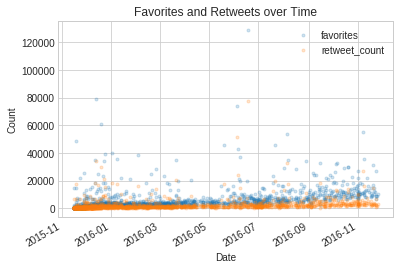

In [22]:
df[['favorites', 'retweet_count']].plot(style = '.', alpha = .2)
plt.title('Favorites and Retweets over Time')
plt.xlabel('Date')
plt.ylabel('Count')

## INSIGHT 2

Text(0,0.5,'Rating')

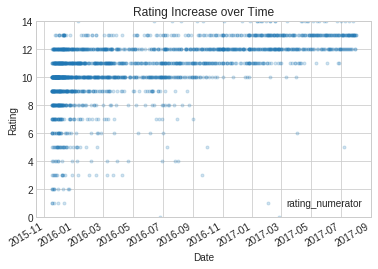

In [23]:
df.plot(y ='rating_numerator', ylim=[0,14], style = '.', alpha = .2)
plt.title('Rating Increase over Time')
plt.xlabel('Date')
plt.ylabel('Rating')

## INSIGHT 3

In [24]:
top_breeds=df.groupby('breed').filter(lambda x: len(x) >= 20)
top_breeds.groupby('breed')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Cardigan,21.0,11.142857,1.590148,7.0,10.00,11.0,12.0,13.0
Chesapeake_Bay_retriever,31.0,10.838710,1.439833,8.0,10.00,10.0,12.0,13.0
Chihuahua,91.0,10.516484,2.083601,3.0,10.00,11.0,12.0,14.0
Eskimo_dog,22.0,11.409091,1.402688,9.0,10.00,12.0,12.0,14.0
French_bulldog,31.0,11.193548,1.796652,8.0,10.00,12.0,12.0,14.0
German_shepherd,21.0,11.000000,1.449138,8.0,10.00,11.0,12.0,13.0
Labrador_retriever,108.0,13.638889,16.791998,7.0,10.00,11.0,12.0,165.0
Pembroke,95.0,11.410526,1.716594,4.0,11.00,12.0,12.0,14.0
Pomeranian,42.0,12.476190,9.978607,6.0,10.00,11.0,12.0,75.0


## VISUALIZATION 1

Text(0,0.5,'Breed')

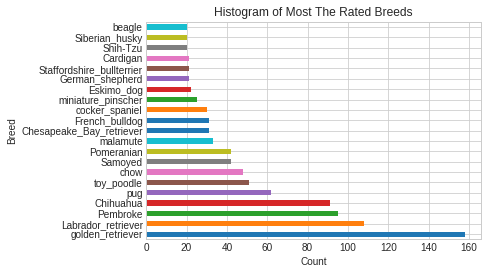

In [25]:
top_breeds['breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Most The Rated Breeds')
plt.xlabel('Count')
plt.ylabel('Breed')